In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel,RBF,RationalQuadratic


'''
X, y = make_friedman2(n_samples=500, noise=0, random_state=0)
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,
        random_state=0)
gpr.fit(X,y)
gpr.score(X, y) 

mean, std = gpr.predict(X[:2,:],return_std=True)
'''

'\nX, y = make_friedman2(n_samples=500, noise=0, random_state=0)\nkernel = DotProduct() + WhiteKernel()\ngpr = GaussianProcessRegressor(kernel=kernel,\n        random_state=0)\ngpr.fit(X,y)\ngpr.score(X, y) \n\nmean, std = gpr.predict(X[:2,:],return_std=True)\n'

In [21]:
#X =  np.linspace(0,10,50).reshape(-1,1)
rng = np.random.RandomState(32)
X = rng.uniform(0,10,50).reshape(-1,1)
y = X * np.sin(X)
x = np.linspace(0,15,100).reshape(-1,1)
#rng = np.random.RandomState(34)
#x = rng.uniform(0, 15, 50)
#x = np.sort(x).reshape(-1,1)


In [3]:
def compute_Mean_Var(train_X,train_y,test_x,kernels):
    for fig_index, kernel in enumerate(kernels):

        gp = GaussianProcessRegressor(kernel=kernel)

        gp.fit(X,y)

        #x = np.linspace(0,15,100).reshape(-1,1)
        mean, std = gp.predict(x,return_std=True)  #mean = y_pred

        plt.figure(fig_index, figsize=(10, 8))
        plt.figure(fig_index)
        plt.plot(X,y,'r.',label=u'Observations')
        plt.plot(x, mean, 'b-', lw=1, zorder=9 , label=u'Mean')
        plt.fill_between(x[:,0], mean[:,0] - 2*std, mean[:,0] + 2*std,alpha=0.2, color='k',label='95% confidence interval')
        plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
                  % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
                  fontsize=12)
        plt.xlim(0,15)
        plt.ylim(-12,20)
        plt.plot(x, np.square(std),label='Variance')
        plt.legend(loc='upper left')
        print('log marginal likelihood = ',gp.log_marginal_likelihood(gp.kernel_.theta))
    plt.show()
    
    return mean,std

## Answer 1 a(i)

/home/samin/environments/py36_env/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


log marginal likelihood =  267.962999784669
log marginal likelihood =  -13734844307.320555


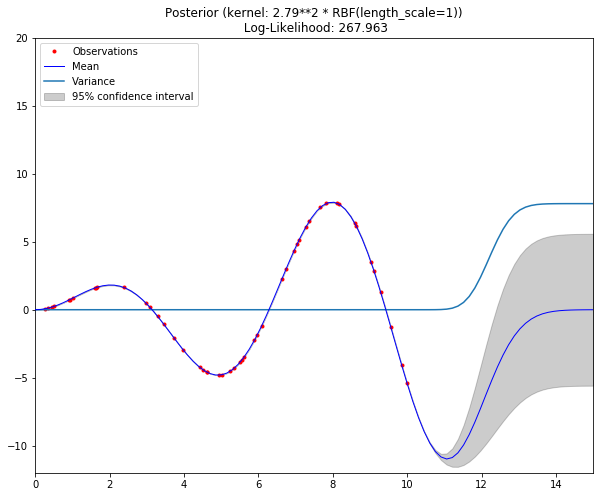

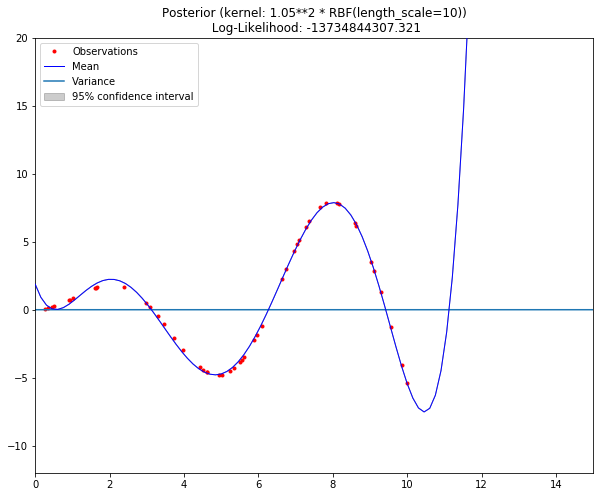

In [24]:
#kernels=[1.1*RBF(0.1, (1e-3, 1.0)),1.1*RBF(10, (10, 1e5)) ]
#kernel = 1.1 * RBF(length_scale=0.1, length_scale_bounds=(1e-3, 1.0))
kernels = [1.1 * RBF(length_scale=0.1, length_scale_bounds=(1e-3, 1.0)),
          1.1 * RBF(length_scale=10, length_scale_bounds=(10, 1e5))]
mean, std = compute_Mean_Var(X,y,x,kernels)


# Report

I tried to show the "95$%$ confidance area" = $mean \pm \sigma$ as it shows better illustration of the changes we see when we vary RBF/length scale $l$. When $l$ is smaller ($l=0.1$) only local points contribute and thus the mean goes through every data point. We get zero variance upto x=10 as we have obversation data in this range and we get high uncertainty (high variance) in the region afterward 
<br/>
As $l$ get's higher all the points contribute equally, mean doesn't exactly immitate observed data points. I think I made mistake at defining Kernel cause in the region of x $\in [10,15]$ we're supposed to have higher variance but here that's unchanged. Also, as we increase $l$ we're supposed to have smoother variance which is not that visible. Our assumption of non-noisy observation might be a factor.

## Answer 1 a(ii)

/home/samin/environments/py36_env/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


log marginal likelihood =  -3637903898745.4053


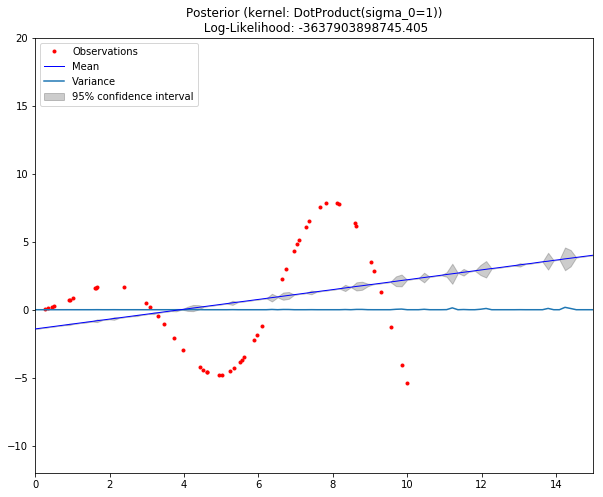

In [5]:
kernels = [DotProduct()]
mean, std = compute_Mean_Var(X,y,x,kernels)

# Report

Linear kernel is not a good predictor for this data. We get a straight line on our prediction unlike we have seen in 1(i) and variance all over the range of x. As our observed data start to vary, our confidence interval get's higher.

# Answer 1 a(iii)

log marginal likelihood =  228.53194723555404


/home/samin/environments/py36_env/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.68090291, -0.52893358]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 75, 'nit': 15, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/samin/environments/py36_env/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


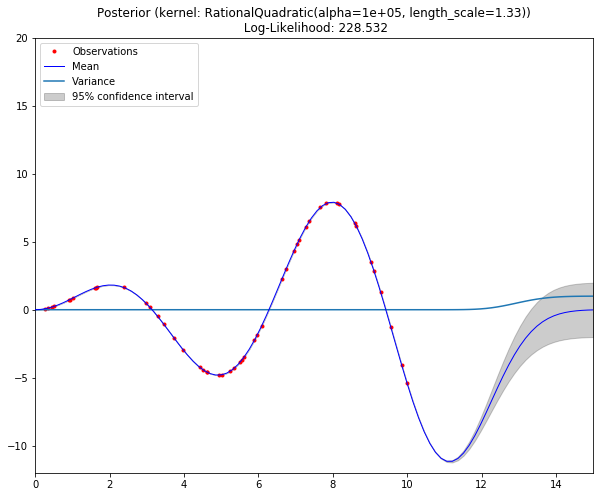

In [6]:
kernels = [RationalQuadratic(length_scale=0.1)]
mean, std = compute_Mean_Var(X,y,x,kernels)


# Report

lower variance than RBF and immitates observed data points better than RBF and Linear kernel

# Answer 1 a(iv)

/home/samin/environments/py36_env/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 7.91627914e-04,  5.50597906e-04, -1.83387198e+02]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 62, 'nit': 15, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/samin/environments/py36_env/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


log marginal likelihood =  267.7861845651878
log marginal likelihood =  267.82385097817036


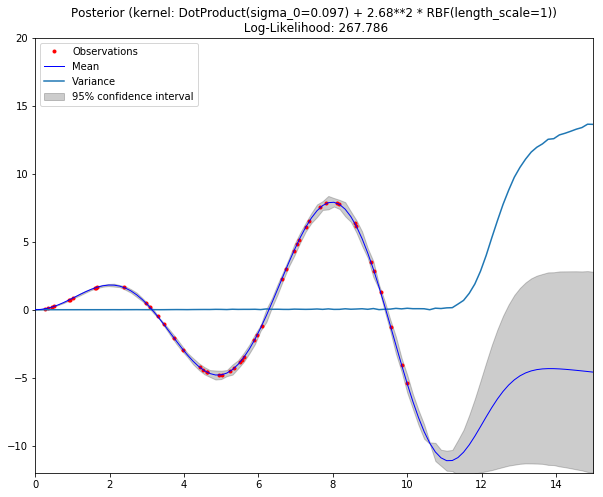

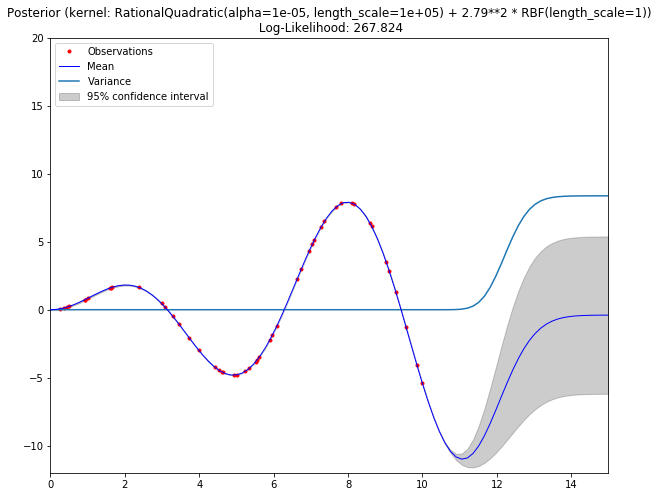

In [7]:
kernels = [DotProduct()+1.1 * RBF(length_scale=0.1, length_scale_bounds=(1e-3, 1.0)),
          RationalQuadratic(length_scale=0.1)+1.1 * RBF(length_scale=0.1, length_scale_bounds=(1e-3, 1.0))]
mean, std = compute_Mean_Var(X,y,x,kernels)

# Report

has higher variance in the region where we have no observation compared RBF kernel and Quadratic kernel. Immitates better than linear kernel. 
<br/>
DotProduct+RBF has higher variance than Quadratic+RBF. If we look closely we see even area where we observation, the DotProduct+RBF has variance.

# Answer 1 b(i)

In [8]:
np.random.normal(0, 0.5, X.shape[0])
X =  np.linspace(0,10,50).reshape(-1,1)
eta = np.random.normal(0, 0.5, X.shape[0]).reshape(-1,1)
y = X * np.sin(X) + eta
x = np.linspace(0,15,100).reshape(-1,1)



# RBF

/home/samin/environments/py36_env/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


log marginal likelihood =  267.962999784669
log marginal likelihood =  -13734844307.320555


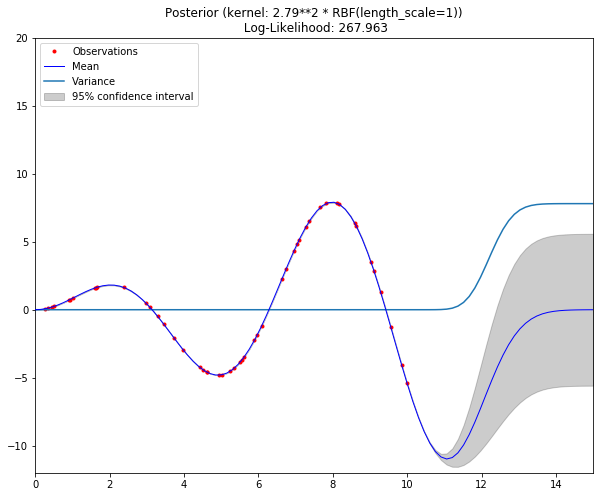

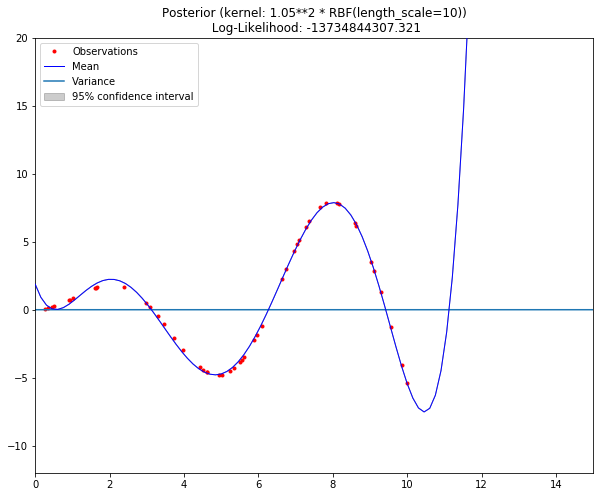

In [29]:
kernels = [1.1 * RBF(length_scale=0.1, length_scale_bounds=(1e-3, 1.0)),
          1.1 * RBF(length_scale=10, length_scale_bounds=(10, 1e5))]
mean, std = compute_Mean_Var(X,y,x,kernels)

In [10]:
y.shape

(50, 1)

# Linear kernel

log marginal likelihood =  -3637903898745.4053


/home/samin/environments/py36_env/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


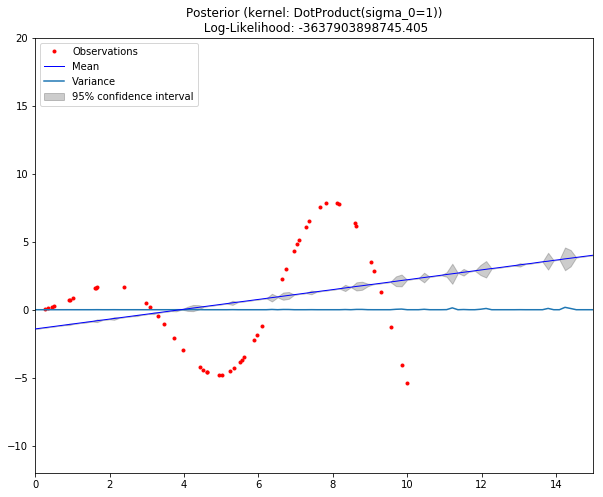

In [27]:
kernels = [DotProduct()]
mean, std = compute_Mean_Var(X,y,x,kernels)

# Rational Quadratic

log marginal likelihood =  -158.00443787439286


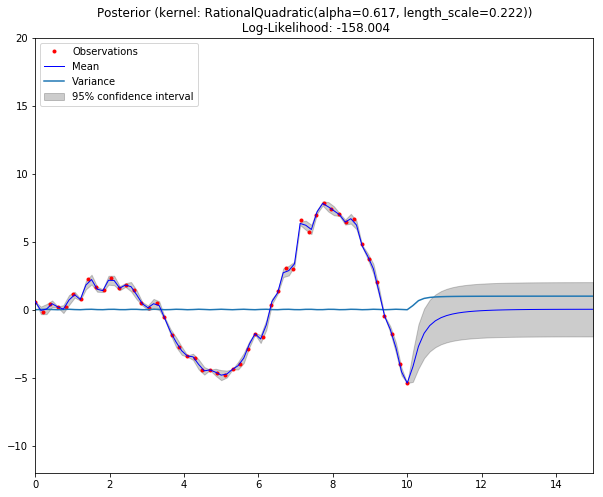

In [12]:
kernels = [RationalQuadratic(length_scale=0.1)]
mean, std = compute_Mean_Var(X,y,x,kernels)

# Report

Due to added noise our obsevation is not smooth sinosidal anymore. Our variance increases all over the range for all the kernels

# Answer b(ii)

# RBF+White kernel

log marginal likelihood =  -61.68367797965767
log marginal likelihood =  -136.25535810274144


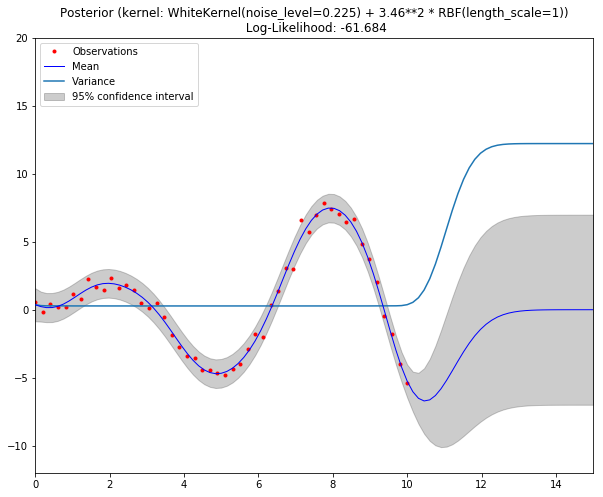

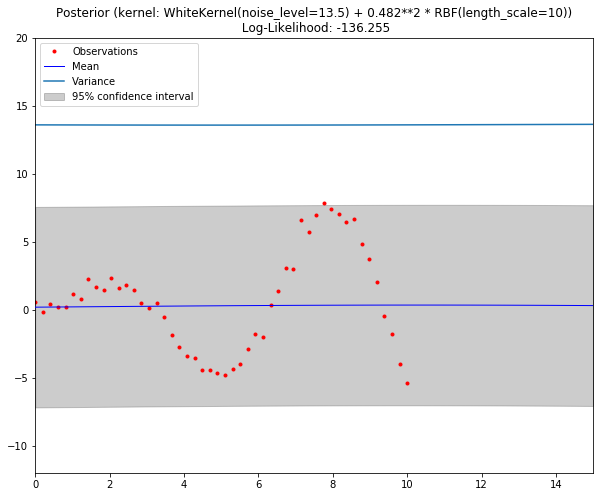

In [13]:
kernels = [WhiteKernel() + 1.1 * RBF(length_scale=0.1, length_scale_bounds=(1e-3, 1.0)),
          WhiteKernel () + 1.1 * RBF(length_scale=10, length_scale_bounds=(10, 1e5))]
mean, std = compute_Mean_Var(X,y,x,kernels)

# Linear kernel+white kernle


log marginal likelihood =  -137.10146400552534


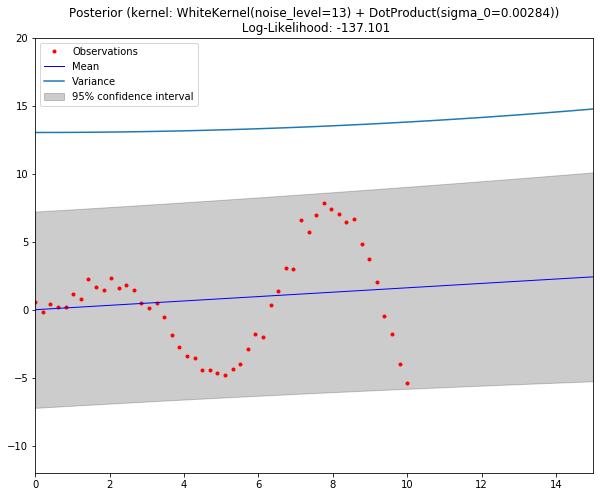

In [14]:
kernels = [WhiteKernel()+DotProduct()]
mean, std = compute_Mean_Var(X,y,x,kernels)

# quadratic + white

log marginal likelihood =  -103.89573263516351


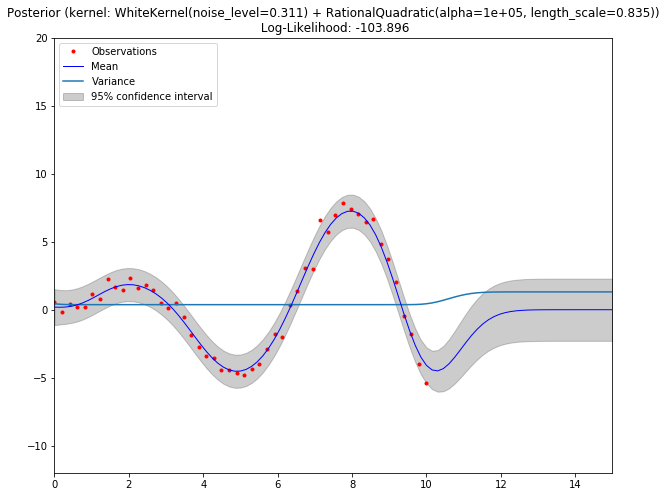

In [15]:
kernels = [WhiteKernel() + RationalQuadratic(length_scale=0.1)]
mean, std = compute_Mean_Var(X,y,x,kernels)

# Answer 1 b(iii)

Report log likihood

In [16]:
#####################################



#####################################

In [17]:
from __future__ import division, print_function

import numpy as np

from matplotlib import pyplot as plt
#from sklearn.datasets import fetch_openml
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
    import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
try:
    from urllib.request import urlopen
except ImportError:
    # Python 2
    from urllib2 import urlopen

print(__doc__)


def load_mauna_loa_atmospheric_co2():
    ml_data = fetch_openml(data_id=41187)
    months = []
    ppmv_sums = []
    counts = []

    y = ml_data.data[:, 0]
    m = ml_data.data[:, 1]
    month_float = y + (m - 1) / 12
    ppmvs = ml_data.target

    for month, ppmv in zip(month_float, ppmvs):
        if not months or month != months[-1]:
            months.append(month)
            ppmv_sums.append(ppmv)
            counts.append(1)
        else:
            # aggregate monthly sum to produce average
            ppmv_sums[-1] += ppmv
            counts[-1] += 1

    months = np.asarray(months).reshape(-1, 1)
    avg_ppmvs = np.asarray(ppmv_sums) / counts
    return months, avg_ppmvs


X, y = load_mauna_loa_atmospheric_co2()

Automatically created module for IPython interactive environment


NameError: name 'fetch_openml' is not defined

In [30]:
##########################


##########################

In [ ]:
import numpy as np
means = np.array([0.1, 0.9])
regrets = np.max(means) - means
K = len(means)
alg = TS_Bernoulli(nb_arms=K, a0=1, b0=1)
cumul_regrets = [0]
for t in range(1000):
k_t = alg.select()
r_t = np.random.rand() < means[k_t]
alg.update(k_t, r_t)
cumul_regrets.append(cumul_regrets[-1]+regrets[k_t])